In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
import seaborn as sns
from itertools import combinations, permutations, combinations_with_replacement

In [2]:
DATAPATH = '../data/archive.sensor.community'

# how the colunms should look like
cols = {'N05',
     'N1',
     'N10',
     'N25',
     'N4',
     'P0',
     'P1',
     'P2',
     'P4',
     'TS',
     'lat',
     'location',
     'lon',
     'sensor_id',
     'sensor_type',
     'timestamp'}

In [3]:
data_dirs = os.listdir(DATAPATH)

path = os.path.join(DATAPATH, data_dirs[0])
files = os.listdir(path)

df_list = []
for file in files:
    file_path = os.path.join(path, file)
    df_list.append(pd.read_csv(file_path, sep=';'))

In [34]:
# merge the data for all frames with the same column names as the first data frame
df = df_list[0]
fail = []
for i, _df in enumerate(df_list[1:]):
    if set(df.columns.to_list()) - set(_df.columns.to_list()):
        fail.append(i+1) 
    else:
        df = pd.concat((df, _df), axis=0, ignore_index=True, join='inner')
df.shape

(117872, 16)

In [35]:
df.head()

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,P4,P2,P0,N10,N4,N25,N1,N05,TS
0,66961,SPS30,53897,51.126,5.868,2022-12-11T00:00:21,44.73,42.82,39.10,32.74,261.69,261.50,260.63,255.73,219.49,0.64
1,66961,SPS30,53897,51.126,5.868,2022-12-11T00:02:47,33.00,31.63,28.95,24.32,194.40,194.26,193.63,190.09,163.33,0.64
2,66961,SPS30,53897,51.126,5.868,2022-12-11T00:05:13,50.39,48.18,43.88,36.59,292.48,292.26,291.25,285.60,244.81,0.64
3,66961,SPS30,53897,51.126,5.868,2022-12-11T00:07:39,55.06,51.94,45.85,36.42,291.28,291.00,289.60,281.77,237.62,0.65
4,66961,SPS30,53897,51.126,5.868,2022-12-11T00:10:05,34.81,33.01,29.48,23.85,190.73,190.56,189.74,185.18,157.16,0.65


In [56]:
def plot_sensors_by_id(senslist, key='P1'):
    fig, ax = plt.subplots(ncols=1)
    for sen in senslist:
        _df = df.loc[df.sensor_id == sen, :]
        _df.set_index('timestamp').plot(y=key, rot=20, ax=ax, label=sen)
    ax.set_title(f'{key}')
    return fig, ax

def plot_sensors(nsens=10, key='P1'):
    fig, ax = plt.subplots(ncols=1)
    for sen in sensors[0:10]:
        _df = df.loc[df.sensor_id == sen, :]
        _df.set_index('timestamp').plot(y=key, rot=20, ax=ax, label=sen)
    ax.set_title(f'{key}')
    return fig, ax

In [6]:
sensors = df.sensor_id.unique()
sensors.shape

(172,)

In [7]:
pos_dict = {}
for sen in sensors:
    pos = df.loc[df.sensor_id == sen, ['lat', 'lon']].iloc[0,:]
    pos_dict[sen] = pos
df_pos = pd.DataFrame(pos_dict).T
df_pos.head()

,lat,lon
66961,51.126000,5.868000
76312,48.698000,9.138000
75995,49.738000,9.004000
70594,52.051023,4.482071
36229,51.618536,5.792490


In [8]:
def distance(ll_pair):
    # calculates haversine distance for list of (lat, lon) pairs
    pos = np.deg2rad(ll_pair)
    #lat_diff, lon_diff = np.diff(pos, axis=0).T
    lat, lon = ll_pair.T
    lat_diff = lat[:,None] - lat
    lon_diff = lon[:, None] - lon
    d = np.sin(lat_diff/2)**2 + np.cos(lat[:, None]) * np.cos(lat) * np.sin(lon_diff/2)**2
    return 2 * 6371 * np.arcsin(np.sqrt(d))

Text(0.5, 1.0, 'Distance of sensors')

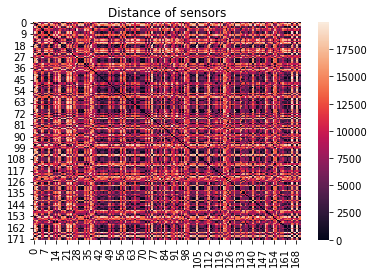

In [ ]:
fig, ax = plt.subplots(ncols=1)
dist = distance(df_pos.values)
sns.heatmap(dist, ax=ax)
ax.set_title('Distance of sensors')

In [16]:
df_dist = pd.DataFrame(dist).stack().reset_index()
combs = list(combinations(np.arange(dist.shape[0]), 2))

In [12]:
df_dist.shape[0]

29584

In [64]:
# get distance for uniqe sensor pairs
df_dist = pd.DataFrame(dist).stack()
combs = list(combinations(np.arange(dist.shape[0]), 2))
idx = df_dist.index
mask = idx.isin(combs)
df_dist = df_dist[mask].reset_index()
df_dist.columns = ['s1', 's2', 'dist']

sensor_idx_dict = {i: sen for i, sen in enumerate(sensors)}
df_dist['s1_id'] = df_dist['s1'].map(sensor_idx_dict)
df_dist['s2_id'] = df_dist['s2'].map(sensor_idx_dict)
df_dist.head()

,s1,s2,dist,s1_id,s2_id
0,0,1,15510.838835,66961,76312
1,0,2,17893.148559,66961,75995
2,0,3,4930.207054,66961,70594
3,0,4,3143.353743,66961,36229
4,0,5,10034.481014,66961,71650


In [68]:
sp_min = df_dist.loc[df_dist.dist == 0.0, :].loc[:, ['s1_id', 's2_id']].values.tolist()


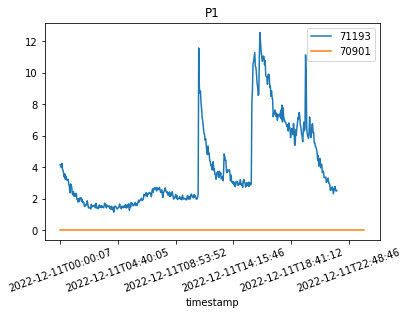

In [70]:
fig, ax = plot_sensors_by_id(sp_min[0])

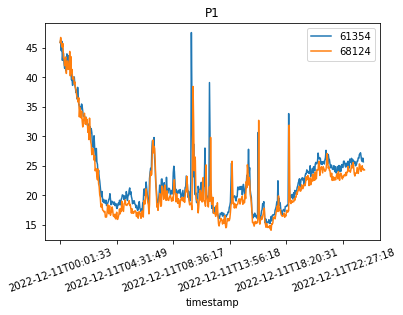

In [71]:
fig, ax = plot_sensors_by_id(sp_min[1])

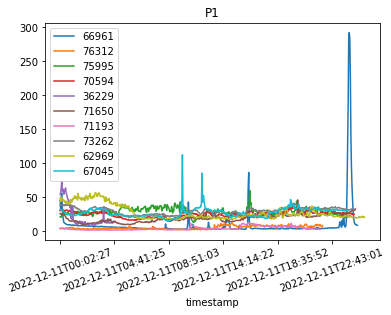

In [165]:
fig, ax = plot_sensors(key='P1')

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'P2'}, xlabel='timestamp'>)

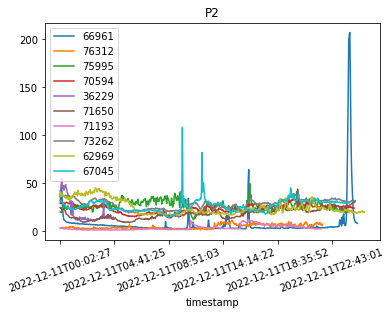

In [169]:
plot_sensors(key='P2')

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'P4'}, xlabel='timestamp'>)

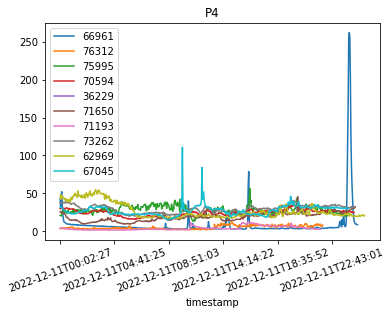

In [167]:
plot_sensors(key='P4')

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'P0'}, xlabel='timestamp'>)

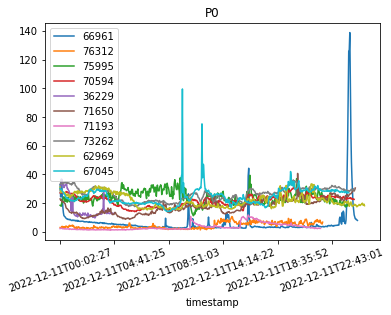

In [168]:
plot_sensors(key='P0')